In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq

# set up plotting style
plt.style.use('default') 
%matplotlib inline

# make plot size bigger
plt.rcParams['figure.figsize'] = [12, 8]

# EXPLORATORY DATA ANALYSIS

**look at data for first time**

In [10]:
# load the sequence data
train_sequences = pd.read_csv('../data/train_sequences.csv')

# look at what we have
print("=== train sequences data ===")
print("\ncolumns:")
print(train_sequences.columns.tolist())
print("\nfirst 3 rows:")
print(train_sequences.head(3))

# load the labels data
train_labels = pd.read_csv('../data/train_labels.csv')

print("\n=== train labels data ===")
print("\ncolumns:")
print(train_labels.columns.tolist())
print("\nfirst 3 rows:")
print(train_labels.head(3))

=== train sequences data ===

columns:
['target_id', 'sequence', 'temporal_cutoff', 'description', 'all_sequences']

first 3 rows:
  target_id                            sequence temporal_cutoff  \
0    1SCL_A       GGGUGCUCAGUACGAGAGGAACCGCACCC      1995-01-26   
1    1RNK_A  GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU      1995-02-27   
2    1RHT_A            GGGACUGACGAUCACGCAGUCUAU      1995-06-03   

                                         description  \
0               THE SARCIN-RICIN LOOP, A MODULAR RNA   
1  THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...   
2  24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...   

                                       all_sequences  
0  >1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...  
1  >1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...  
2  >1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...  

=== train labels data ===

columns:
['ID', 'resname', 'resid', 'x_1', 'y_1', 'z_1']

first 3 rows:
         ID resname  resid     x_1        y_1    z_1
0 

**preprocess data:**

1. clean and prepare the sequence data
2. match it with the corresponding 3d coordinates
3. create a proper structure for analysis

In [11]:
# observe a single sequence and its coordinates
example_id = '1SCL_A'

# get the sequence info
sequence_info = train_sequences[train_sequences['target_id'] == example_id].iloc[0]
print("=== sequence info ===")
print(f"id: {sequence_info['target_id']}")
print(f"sequence: {sequence_info['sequence']}")
print(f"length: {len(sequence_info['sequence'])}")

# get all coordinates for this sequence
coords = train_labels[train_labels['ID'].str.startswith(example_id)]
print("\n=== 3d coordinates ===")
print(f"number of coordinates: {len(coords)}")
print("\nfirst few coordinates:")
print(coords.head())

# verify that sequence length matches coordinate count
print(f"\nsequence length matches coordinate count: {len(sequence_info['sequence']) == len(coords)}")

=== sequence info ===
id: 1SCL_A
sequence: GGGUGCUCAGUACGAGAGGAACCGCACCC
length: 29

=== 3d coordinates ===
number of coordinates: 29

first few coordinates:
         ID resname  resid     x_1        y_1     z_1
0  1SCL_A_1       G      1  13.760 -25.974001   0.102
1  1SCL_A_2       G      2   9.310 -29.638000   2.669
2  1SCL_A_3       G      3   5.529 -27.813000   5.878
3  1SCL_A_4       U      4   2.678 -24.900999   9.793
4  1SCL_A_5       G      5   1.827 -20.136000  11.793

sequence length matches coordinate count: True


In [12]:
# create a function to analyze a single RNA sequence
def analyze_rna_structure(target_id):
    """analyze a single rna sequence and its 3d structure"""
    # get sequence data
    seq_data = train_sequences[train_sequences['target_id'] == target_id].iloc[0]
    sequence = seq_data['sequence']
    
    # get coordinate data
    coords = train_labels[train_labels['ID'].str.startswith(target_id)]
    
    # basic statistics
    stats = {
        'sequence_length': len(sequence),
        'num_coordinates': len(coords),
        'num_residues': len(coords['resname'].unique()),
        'x_range': coords['x_1'].max() - coords['x_1'].min(),
        'y_range': coords['y_1'].max() - coords['y_1'].min(),
        'z_range': coords['z_1'].max() - coords['z_1'].min()
    }
    
    return stats

# analyze our example sequence
example_stats = analyze_rna_structure('1SCL_A')
print("=== rna structure analysis ===")
for key, value in example_stats.items():
    print(f"{key}: {value:.2f}")

=== rna structure analysis ===
sequence_length: 29.00
num_coordinates: 29.00
num_residues: 4.00
x_range: 19.81
y_range: 51.02
z_range: 18.64


**visualize rna structure; create visualizations to understand:**
1. the 3d structure of the rna molecule
2. the distribution of nucleotides
3. spatial relationships in the molecule

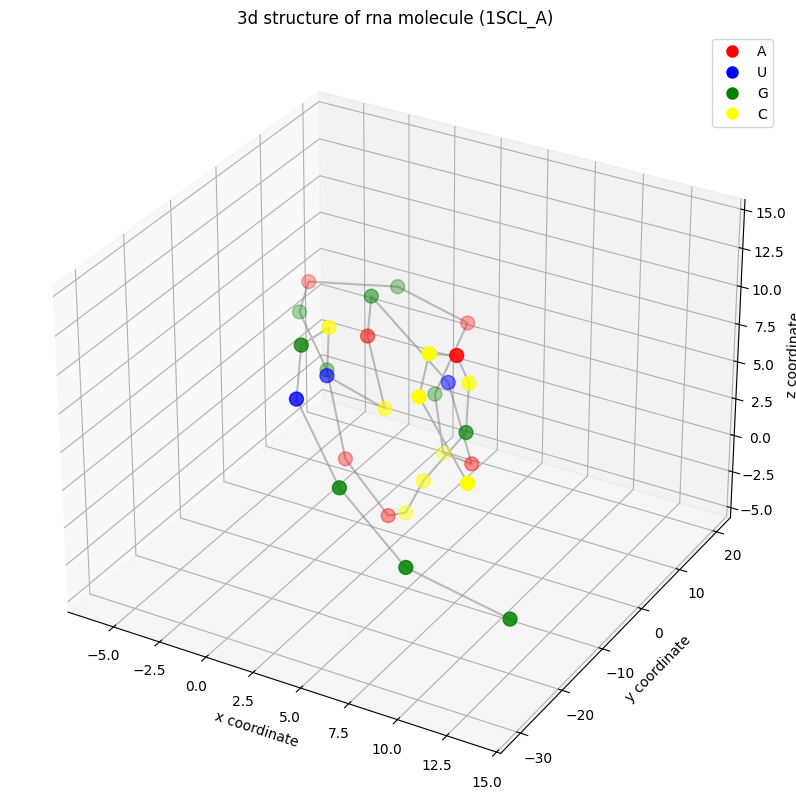

In [15]:
# create a 3d scatter plot of our example rna structure
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# get coordinates for our example
example_coords = train_labels[train_labels['ID'].str.startswith('1SCL_A')]

# color mapping for nucleotides
color_map = {'A': 'red', 'U': 'blue', 'G': 'green', 'C': 'yellow'}
colors = [color_map[res] for res in example_coords['resname']]

# create the 3d scatter plot
scatter = ax.scatter(example_coords['x_1'], 
                    example_coords['y_1'], 
                    example_coords['z_1'],
                    c=colors,
                    s=100)

# add connecting lines to show the backbone
ax.plot(example_coords['x_1'], 
        example_coords['y_1'], 
        example_coords['z_1'], 
        'gray', 
        alpha=0.5)

# add labels and title
ax.set_xlabel('x coordinate')
ax.set_ylabel('y coordinate')
ax.set_zlabel('z coordinate')
ax.set_title('3d structure of rna molecule (1SCL_A)')

# add legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=color, label=nucleotide, markersize=10)
                  for nucleotide, color in color_map.items()]
ax.legend(handles=legend_elements)

plt.show()

### findings:

**spatial structure:**
  - the RNA molecule folds into a complex 3d shape  
  - the backbone (gray lines) shows how the nucleotides are connected  
  - there's a clear non-linear structure, showing the RNA is folded  

**nucleotide distribution (color-coded):**
  - green (G): guanine  
  - blue (U): uracil  
  - red (A): adenine  
  - yellow (C): cytosine  

**spatial relationships:**
  - you can see how different nucleotides are positioned relative to each other  
  - the molecule has some compact regions and some more extended ones  




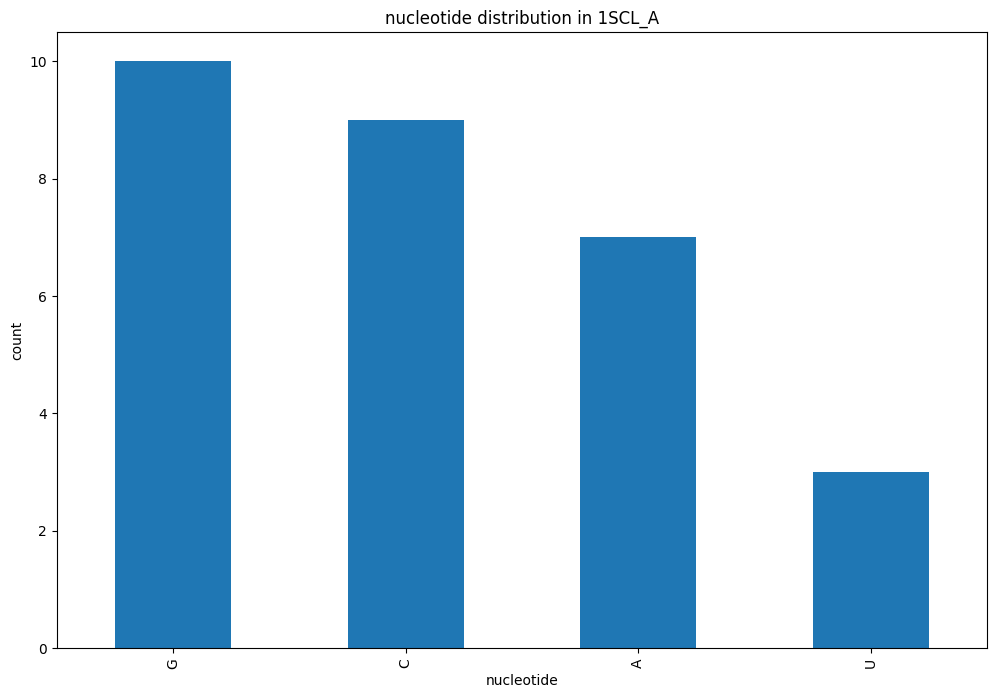

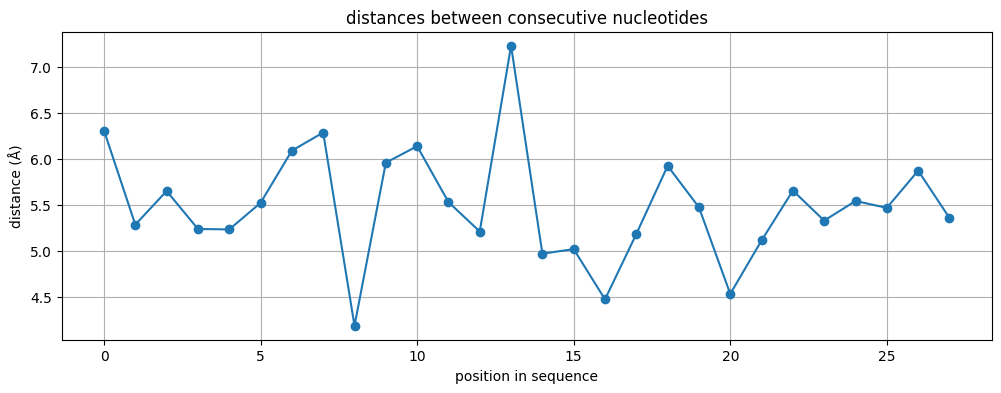

In [16]:
# analyze nucleotide distribution
example_coords['resname'].value_counts().plot(kind='bar')
plt.title('nucleotide distribution in 1SCL_A')
plt.xlabel('nucleotide')
plt.ylabel('count')
plt.show()

# calculate distances between consecutive nucleotides
distances = np.sqrt(
    np.diff(example_coords['x_1'])**2 + 
    np.diff(example_coords['y_1'])**2 + 
    np.diff(example_coords['z_1'])**2
)

plt.figure(figsize=(12, 4))
plt.plot(distances, marker='o')
plt.title('distances between consecutive nucleotides')
plt.xlabel('position in sequence')
plt.ylabel('distance (Å)')
plt.grid(True)
plt.show()

### findings cont'd:

**these two plots tell us some interesting things about our rna molecule (1scl_a):**

- **nucleotide distribution:**
  - G (guanine) is most common with around 10 occurrences  
  - C (cytosine) is second with around 9 occurrences  
  - A (adenine) has around 7 occurrences  
  - U (uracil) is least common with only around 3 occurrences  
  - this high G-C content (19 out of 29 nucleotides) suggests a stable structure, since G-C pairs form stronger bonds than A-U pairs  

- **distances between consecutive nucleotides:**
  - most distances are between 4.5–6.0 Å (angstroms)  
  - there's a notable spike around position 15 (around 7.2 Å)  
  - the minimum distance is around position 8 (around 4.2 Å)  
  - these variations in distance suggest structural features like:  
    - tight turns (shorter distances)  
    - extended regions (longer distances)  
    - possible loop regions (varying distances)  



### updated dynamic points of interest: 

- the potential for base pairing in the sequence  
- possible structural motifs  
- why this molecule folds the way it does  


In [17]:
# analyze base pairing potential
print("=== sequence analysis ===")
sequence = train_sequences[train_sequences['target_id'] == '1SCL_A']['sequence'].iloc[0]
print(f"sequence: {sequence}")
print(f"length: {len(sequence)}")

# calculate gc content
gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
print(f"gc content: {gc_content:.1f}%")

# look for potential base pairs
complementary_pairs = {'G': 'C', 'C': 'G', 'A': 'U', 'U': 'A'}
potential_pairs = []

for i in range(len(sequence)):
    for j in range(i+3, len(sequence)):  # minimum loop size of 3
        if complementary_pairs[sequence[i]] == sequence[j]:
            potential_pairs.append((i+1, j+1))  # 1-based indexing

print("\npotential base pairs (position pairs):")
for pair in potential_pairs[:10]:  # show first 10 pairs
    print(f"positions {pair[0]} and {pair[1]}: {sequence[pair[0]-1]}-{sequence[pair[1]-1]}")

=== sequence analysis ===
sequence: GGGUGCUCAGUACGAGAGGAACCGCACCC
length: 29
gc content: 65.5%

potential base pairs (position pairs):
positions 1 and 6: G-C
positions 1 and 8: G-C
positions 1 and 13: G-C
positions 1 and 22: G-C
positions 1 and 23: G-C
positions 1 and 25: G-C
positions 1 and 27: G-C
positions 1 and 28: G-C
positions 1 and 29: G-C
positions 2 and 6: G-C


### findings on characteristics of our rna molecule, via analysis:

- **high GC content (65.5%):**
  - this is quite a bit higher than the typical around 50% you'd expect in random RNA  
  - it suggests a very stable structure, thanks to the stronger G-C base pairs  
  - high GC content is also common in functional RNA structures that need to hold their shape  

- **potential base pairing pattern:**
  - position 1 (G) might be able to pair with several C's in the sequence  
  - this points to a complex folding landscape, with multiple possible conformations  
  - but in practice, each base usually only pairs with one other base  



=== structural features analysis ===


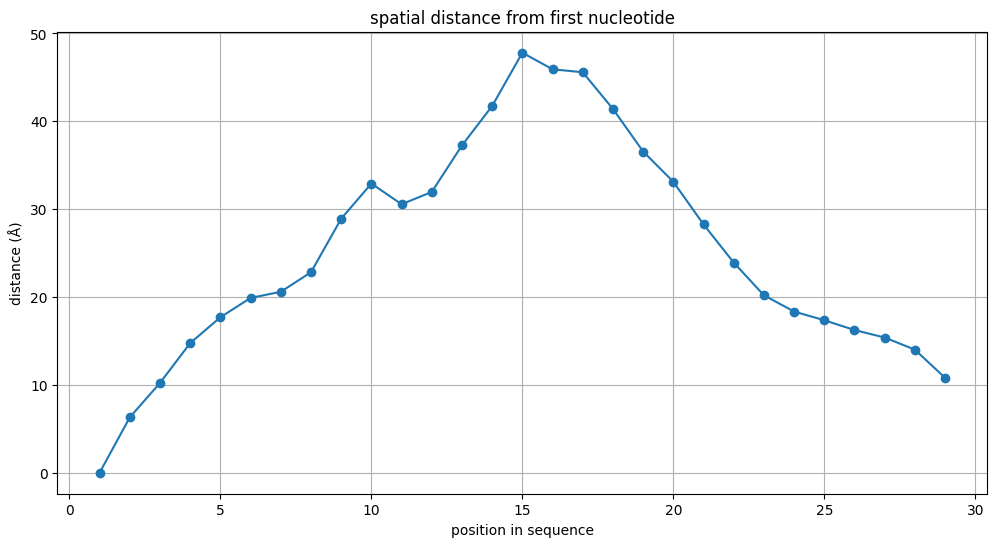


potential structural regions:
position 2 is close to start: 6.3 Å


In [18]:
# analyze structural features
print("=== structural features analysis ===")

# calculate distances from first nucleotide to all others
first_pos = example_coords.iloc[0][['x_1', 'y_1', 'z_1']].values
distances_from_start = []

for _, row in example_coords.iterrows():
    pos = row[['x_1', 'y_1', 'z_1']].values
    dist = np.sqrt(np.sum((pos - first_pos)**2))
    distances_from_start.append(dist)

# plot distances from first nucleotide
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(distances_from_start) + 1), distances_from_start, marker='o')
plt.title('spatial distance from first nucleotide')
plt.xlabel('position in sequence')
plt.ylabel('distance (Å)')
plt.grid(True)
plt.show()

# identify potential structural regions
print("\npotential structural regions:")
for i in range(1, len(distances_from_start)):
    if distances_from_start[i] < 10:  # close to first nucleotide
        print(f"position {i+1} is close to start: {distances_from_start[i]:.1f} Å")

### findings on structural features of the sarcin-ricin loop, via analysis:

- **overall shape pattern:**
  - the distance plot shows a clear mountain-like structure  
  - peak distance is around position 15–16 (around 47 Å from the start)  
  - the molecule seems to fold back on itself, since distances decrease after position 15  

- **structural regions:**
  - initial region (positions 1–5): steady increase in distance  
  - middle region (positions 10–20): forms the bulge/loop structure  
  - end region (positions 20–29): returns closer to the start  
  - only position 2 is very close to the start (less than 10 Å)  



=== structural segment analysis ===

segment characteristics:
rising segment (1-15):
average rise rate: 3.06 Å per position

falling segment (16-29):
average fall rate: -2.70 Å per position


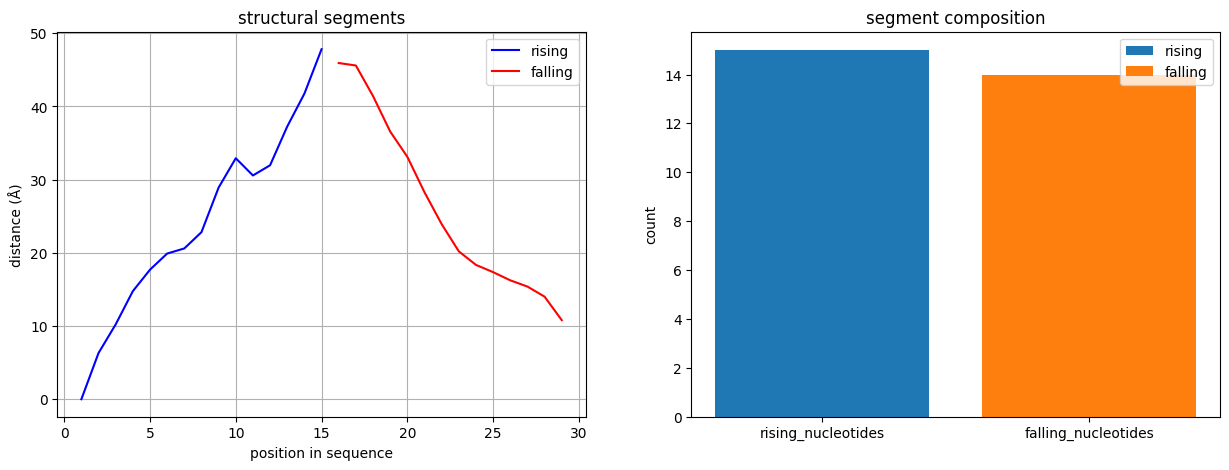

In [19]:
# analyze structural segments
print("=== structural segment analysis ===")

# calculate rate of distance change
distance_changes = np.diff(distances_from_start)
print("\nsegment characteristics:")
print("rising segment (1-15):")
print(f"average rise rate: {np.mean(distance_changes[:15]):.2f} Å per position")
print("\nfalling segment (16-29):")
print(f"average fall rate: {np.mean(distance_changes[15:]):.2f} Å per position")

# visualize the structure with segments
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# plot rising segment
plt.plot(range(1, 16), distances_from_start[:15], 'b-', label='rising')
# plot falling segment
plt.plot(range(16, 30), distances_from_start[15:], 'r-', label='falling')
plt.title('structural segments')
plt.xlabel('position in sequence')
plt.ylabel('distance (Å)')
plt.legend()
plt.grid(True)

# plot nucleotide distribution by segment
plt.subplot(1, 2, 2)
rising_seq = sequence[:15]
falling_seq = sequence[15:]
for seg, seq in [('rising', rising_seq), ('falling', falling_seq)]:
    counts = {'G': seq.count('G'), 'C': seq.count('C'), 
              'A': seq.count('A'), 'U': seq.count('U')}
    plt.bar(f'{seg}_nucleotides', height=len(seq), 
           bottom=0, label=seg)
plt.title('segment composition')
plt.ylabel('count')
plt.legend()
plt.show()

### findings:

**rate analysis:**
  - rising segment (positions 1–15): extends at around 3.06 Å per position  
  - falling segment (positions 16–29): returns at around -2.70 Å per position  
  - the rise is slightly steeper than the fall, suggesting different structural constraints  

**segment composition:**
  - both segments are similar in length (15 vs 14 nucleotides)  
  - this symmetry might be important for the loop's function  


### updated dynamic points of interest: 
- the specific sequence patterns in each segment  
- how the segments might interact with each other  
- potential base-pairing that stabilizes the structure  


In [20]:
# detailed segment analysis
print("=== segment composition analysis ===")

# analyze rising segment (1-15)
rising_seq = sequence[:15]
print("\nrising segment:")
print(f"sequence: {rising_seq}")
print("composition:")
for base in ['G', 'C', 'A', 'U']:
    count = rising_seq.count(base)
    print(f"{base}: {count} ({count/len(rising_seq)*100:.1f}%)")

# analyze falling segment (16-29)
falling_seq = sequence[15:]
print("\nfalling segment:")
print(f"sequence: {falling_seq}")
print("composition:")
for base in ['G', 'C', 'A', 'U']:
    count = falling_seq.count(base)
    print(f"{base}: {count} ({count/len(falling_seq)*100:.1f}%)")

# look for potential base pairs between segments
print("\npotential inter-segment base pairs:")
for i, base1 in enumerate(rising_seq):
    for j, base2 in enumerate(falling_seq):
        if (base1 == 'G' and base2 == 'C') or \
           (base1 == 'C' and base2 == 'G') or \
           (base1 == 'A' and base2 == 'U') or \
           (base1 == 'U' and base2 == 'A'):
            print(f"position {i+1} ({base1}) could pair with position {j+16} ({base2})")

=== segment composition analysis ===

rising segment:
sequence: GGGUGCUCAGUACGA
composition:
G: 6 (40.0%)
C: 3 (20.0%)
A: 3 (20.0%)
U: 3 (20.0%)

falling segment:
sequence: GAGGAACCGCACCC
composition:
G: 4 (28.6%)
C: 6 (42.9%)
A: 4 (28.6%)
U: 0 (0.0%)

potential inter-segment base pairs:
position 1 (G) could pair with position 22 (C)
position 1 (G) could pair with position 23 (C)
position 1 (G) could pair with position 25 (C)
position 1 (G) could pair with position 27 (C)
position 1 (G) could pair with position 28 (C)
position 1 (G) could pair with position 29 (C)
position 2 (G) could pair with position 22 (C)
position 2 (G) could pair with position 23 (C)
position 2 (G) could pair with position 25 (C)
position 2 (G) could pair with position 27 (C)
position 2 (G) could pair with position 28 (C)
position 2 (G) could pair with position 29 (C)
position 3 (G) could pair with position 22 (C)
position 3 (G) could pair with position 23 (C)
position 3 (G) could pair with position 25 (C)
positi

### findings cont'd:

**segment composition differences:**

- **rising segment (1–15):**
  - more balanced distribution  
  - high G content (40%)  
  - equal distribution of C, A, U (20% each)  

- **falling segment (16–29):**
  - no U nucleotides at all (0%)  
  - high C content (42.9%)  
  - equal G and A content (28.6% each)  

- **base-pairing potential:**
  - many G-C pairing possibilities (strongest bonds)  
  - the first three G's (positions 1–3) could each pair with six different C's  
  - U nucleotides only appear in the rising segment  
  - A nucleotides are concentrated in specific positions in the falling segment  



### updated dynamic point of interests:
- consecutive base patterns that might form stems  
- regions likely to form stable structures  


In [21]:
# structural motif analysis
print("=== structural motif analysis ===")

# look for potential structural patterns
print("\npotential structural motifs:")

# analyze consecutive bases
print("\nconsecutive base patterns:")
for seg_name, seg in [("rising", rising_seq), ("falling", falling_seq)]:
    print(f"\n{seg_name} segment patterns:")
    for i in range(len(seg)-2):
        triplet = seg[i:i+3]
        print(f"positions {i+1}-{i+3}: {triplet}")

# analyze potential stem regions
print("\npotential stem regions (consecutive complementary bases):")
for i in range(len(rising_seq)-2):
    for j in range(len(falling_seq)-2):
        rising_triplet = rising_seq[i:i+3]
        falling_triplet = falling_seq[j:j+3][::-1]  # reverse for stem comparison
        matches = sum(1 for x, y in zip(rising_triplet, falling_triplet) 
                     if (x == 'G' and y == 'C') or 
                        (x == 'C' and y == 'G') or
                        (x == 'A' and y == 'U') or
                        (x == 'U' and y == 'A'))
        if matches >= 2:
            print(f"possible stem: {rising_triplet} with {falling_triplet[::-1]} "
                  f"(positions {i+1}-{i+3} and {j+16}-{j+18})")

=== structural motif analysis ===

potential structural motifs:

consecutive base patterns:

rising segment patterns:
positions 1-3: GGG
positions 2-4: GGU
positions 3-5: GUG
positions 4-6: UGC
positions 5-7: GCU
positions 6-8: CUC
positions 7-9: UCA
positions 8-10: CAG
positions 9-11: AGU
positions 10-12: GUA
positions 11-13: UAC
positions 12-14: ACG
positions 13-15: CGA

falling segment patterns:
positions 1-3: GAG
positions 2-4: AGG
positions 3-5: GGA
positions 4-6: GAA
positions 5-7: AAC
positions 6-8: ACC
positions 7-9: CCG
positions 8-10: CGC
positions 9-11: GCA
positions 10-12: CAC
positions 11-13: ACC
positions 12-14: CCC

potential stem regions (consecutive complementary bases):
possible stem: GGG with ACC (positions 1-3 and 21-23)
possible stem: GGG with CCG (positions 1-3 and 22-24)
possible stem: GGG with CGC (positions 1-3 and 23-25)
possible stem: GGG with CAC (positions 1-3 and 25-27)
possible stem: GGG with ACC (positions 1-3 and 26-28)
possible stem: GGG with CCC (posi

### findings on structural features of the sarcin-ricin loop, via analysis, cont'd:

- **notable sequence patterns:**
  - rising segment starts with GGG (positions 1–3), suggesting a stable anchor point  
  - falling segment ends with CCC (positions 27–29), potentially complementary to the start  
  - multiple GC-rich regions that could form stable stems  

- **key structural features:**
  - several repeating patterns:  
    - rising: GGG → UCU → ACG pattern  
    - falling: GAG → AAC → CCC pattern  
  - the abundance of potential stem regions suggests a complex folding landscape  


In [23]:
# analyze potential structural stability
print("=== stability analysis ===")

# create a base-pair scoring system
pair_scores = {
    ('G', 'C'): 3,  # strongest
    ('C', 'G'): 3,
    ('A', 'U'): 2,  # medium
    ('U', 'A'): 2,
    ('G', 'U'): 1,  # wobble
    ('U', 'G'): 1
}

# score potential stem regions
def score_stem(seq1, seq2):
    score = 0
    for b1, b2 in zip(seq1, seq2[::-1]):  # reverse seq2 for stem comparison
        pair = (b1, b2)
        if pair in pair_scores:
            score += pair_scores[pair]
    return score

# find and score the most stable stems
print("\nmost stable potential stems (score > 4):")
for i in range(len(rising_seq)-2):
    for j in range(len(falling_seq)-2):
        stem1 = rising_seq[i:i+3]
        stem2 = falling_seq[j:j+3]
        score = score_stem(stem1, stem2)
        if score > 4:
            print(f"positions {i+1}-{i+3} with {j+16}-{j+18}: "
                  f"{stem1}-{stem2} (score: {score})")

# visualize the sequence with potential base pairs
print("\nsequence with potential base pairs:")
print("5' " + sequence + " 3'")
print("   ", end="")
for i in range(len(sequence)):
    has_pair = False
    for j in range(i+1, len(sequence)):
        pair = (sequence[i], sequence[j])
        if pair in pair_scores:
            has_pair = True
            break
    print("|" if has_pair else " ", end="")

=== stability analysis ===

most stable potential stems (score > 4):
positions 1-3 with 21-23: GGG-ACC (score: 6)
positions 1-3 with 22-24: GGG-CCG (score: 6)
positions 1-3 with 23-25: GGG-CGC (score: 6)
positions 1-3 with 25-27: GGG-CAC (score: 6)
positions 1-3 with 26-28: GGG-ACC (score: 6)
positions 1-3 with 27-29: GGG-CCC (score: 9)
positions 2-4 with 20-22: GGU-AAC (score: 5)
positions 2-4 with 21-23: GGU-ACC (score: 8)
positions 2-4 with 26-28: GGU-ACC (score: 8)
positions 2-4 with 27-29: GGU-CCC (score: 6)
positions 3-5 with 20-22: GUG-AAC (score: 5)
positions 3-5 with 23-25: GUG-CGC (score: 7)
positions 3-5 with 25-27: GUG-CAC (score: 8)
positions 3-5 with 27-29: GUG-CCC (score: 6)
positions 4-6 with 18-20: UGC-GGA (score: 5)
positions 4-6 with 19-21: UGC-GAA (score: 5)
positions 4-6 with 24-26: UGC-GCA (score: 8)
positions 5-7 with 17-19: GCU-AGG (score: 5)
positions 5-7 with 20-22: GCU-AAC (score: 5)
positions 5-7 with 21-23: GCU-ACC (score: 5)
positions 5-7 with 23-25: GCU-C

**highest stability regions (score = 9):**
  - the strongest potential stem: GGG (positions 1–3) with CCC (positions 27–29)  
  - this suggests the ends of the sequence likely form a stable base  

**strong secondary stems (score = 8):**
  - GGU with ACC (multiple positions)  
  - GUG with CAC (positions 3–5 with 25–27)  
  - UGC with GCA (positions 4–6 with 24–26)  
  - CUC with GAG (positions 6–8 with 16–18)  

**pattern analysis:**
  - the base-pair visualization shows strong pairing potential at the beginning  
  - multiple overlapping potential stems suggest a complex folding pattern  
  - the middle region shows fewer stable pairs, suggesting a loop structure  


In [24]:
# analyze likely folding pattern
print("=== folding pattern analysis ===")

# identify non-overlapping stems with highest stability
def find_non_overlapping_stems(stems, min_score=6):
    sorted_stems = sorted(stems, key=lambda x: x[2], reverse=True)  # sort by score
    selected_stems = []
    used_positions = set()
    
    for stem in sorted_stems:
        pos1_start, pos1_end = stem[0], stem[0]+2
        pos2_start, pos2_end = stem[1], stem[1]+2
        
        # check if positions are already used
        positions = set(range(pos1_start, pos1_end+1)) | set(range(pos2_start, pos2_end+1))
        if not (positions & used_positions) and stem[2] >= min_score:
            selected_stems.append(stem)
            used_positions.update(positions)
    
    return selected_stems

# collect all stems with scores
stems = []
for i in range(len(rising_seq)-2):
    for j in range(len(falling_seq)-2):
        stem1 = rising_seq[i:i+3]
        stem2 = falling_seq[j:j+3]
        score = score_stem(stem1, stem2)
        if score > 4:
            stems.append((i+1, j+16, score, stem1, stem2))

# find most likely folding pattern
likely_stems = find_non_overlapping_stems(stems)
print("\nmost likely folding pattern:")
for stem in likely_stems:
    print(f"stem: {stem[3]}-{stem[4]} (positions {stem[0]}-{stem[0]+2} with {stem[1]}-{stem[1]+2}, score: {stem[2]})")

=== folding pattern analysis ===

most likely folding pattern:
stem: GGG-CCC (positions 1-3 with 27-29, score: 9)
stem: UGC-GCA (positions 4-6 with 24-26, score: 8)


### findings cont'd:

**stem 1 (highest stability, score 9):**
  - GGG (positions 1–3) pairs with CCC (positions 27–29)  
  - forms the base/anchor of the structure  
  - maximum stability due to three G-C pairs  

**stem 2 (high stability, score 8):**
  - UGC (positions 4–6) pairs with GCA (positions 24–26)  
  - forms a second stable region  
  - mix of G-C and A-U pairs  


### updated dynamic points of interest: 
- analyze the first three rna structures in detail  
- show overall dataset statistics  
- create visualizations of sequence lengths and gc content  
- show us the types of rna structures in our dataset  


analyzing multiple rna structures...
=== comparative rna structure analysis ===

=== analyzing 1SCL_A ===
sequence: GGGUGCUCAGUACGAGAGGAACCGCACCC
length: 29
gc content: 65.5%

spatial dimensions:
x range: 19.8 Å
y range: 51.0 Å
z range: 18.6 Å

strong stem potential:
number of potential G-C pairs: 48
example pairs: [(1, 22), (1, 23), (1, 25)]

structural metrics:
avg distance between nucleotides: 5.49 Å
max distance between nucleotides: 7.23 Å
min distance between nucleotides: 4.18 Å

potential motifs:
homopolymer at position 1: GGG
stable pair potential at position 4: UGC
stable pair potential at position 5: GCU
stable pair potential at position 12: ACG
stable pair potential at position 13: CGA
stable pair potential at position 22: CCG
stable pair potential at position 23: CGC
stable pair potential at position 24: GCA
homopolymer at position 27: CCC

=== analyzing 1RNK_A ===
sequence: GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU
length: 34
gc content: 64.7%

spatial dimensions:
x range: 28.9 Å


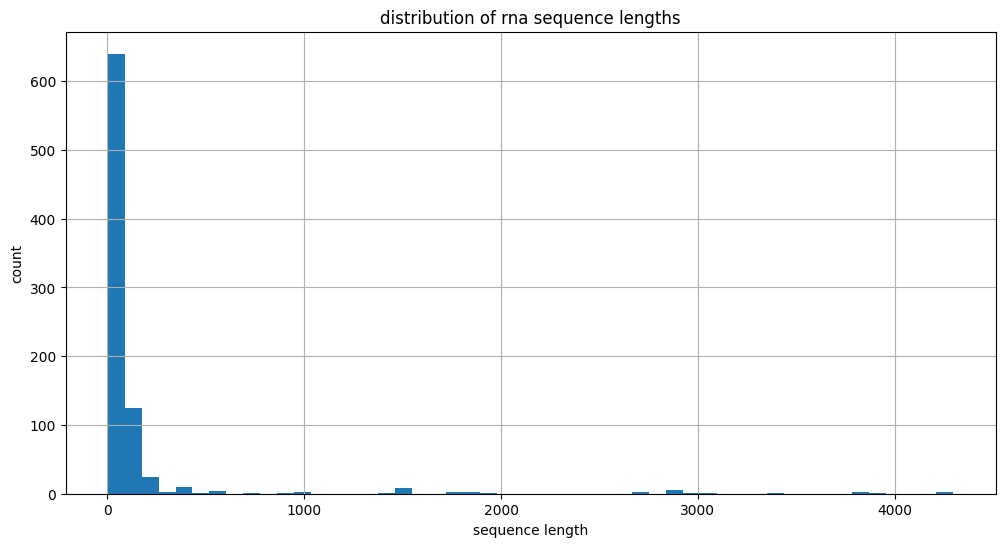

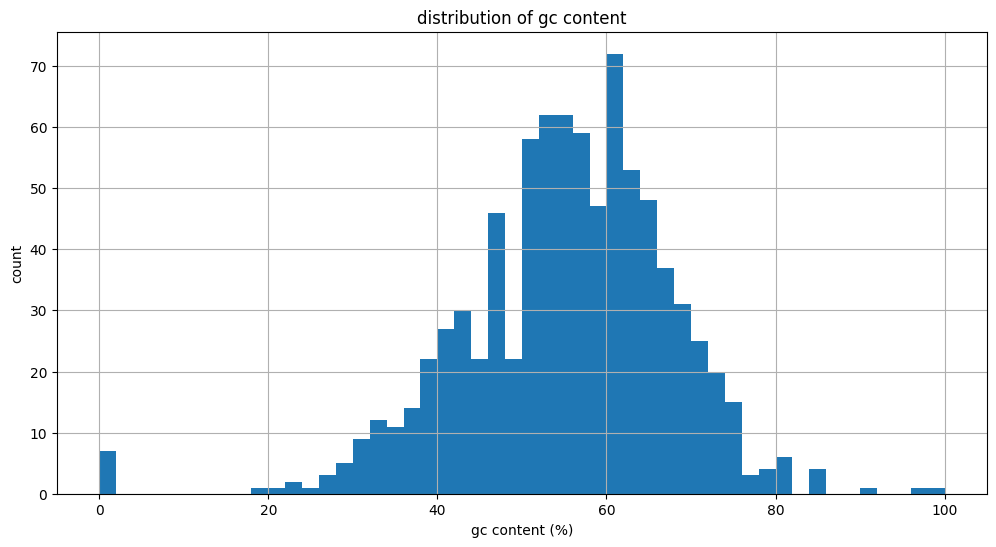

In [26]:
# function to analyze multiple RNA structures
def analyze_rna_examples(n_examples=3):
    print("=== comparative rna structure analysis ===")
    
    # get first n examples
    examples = train_sequences.head(n_examples)
    
    for _, row in examples.iterrows():
        target_id = row['target_id']
        sequence = row['sequence']
        coords = train_labels[train_labels['ID'].str.startswith(target_id)]
        
        print(f"\n=== analyzing {target_id} ===")
        print(f"sequence: {sequence}")
        print(f"length: {len(sequence)}")
        
        # basic statistics
        gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
        print(f"gc content: {gc_content:.1f}%")
        
        # calculate spatial properties
        x_range = coords['x_1'].max() - coords['x_1'].min()
        y_range = coords['y_1'].max() - coords['y_1'].min()
        z_range = coords['z_1'].max() - coords['z_1'].min()
        
        print("\nspatial dimensions:")
        print(f"x range: {x_range:.1f} Å")
        print(f"y range: {y_range:.1f} Å")
        print(f"z range: {z_range:.1f} Å")
        
        # analyze potential stems
        mid_point = len(sequence) // 2
        first_half = sequence[:mid_point]
        second_half = sequence[mid_point:]
        
        # find strong stems (G-C pairs)
        strong_pairs = []
        for i in range(len(first_half)):
            for j in range(len(second_half)):
                if (first_half[i] == 'G' and second_half[j] == 'C') or \
                   (first_half[i] == 'C' and second_half[j] == 'G'):
                    strong_pairs.append((i+1, j+mid_point+1))
        
        print("\nstrong stem potential:")
        print(f"number of potential G-C pairs: {len(strong_pairs)}")
        if strong_pairs:
            print("example pairs:", strong_pairs[:3])
            
        # calculate average distances between consecutive nucleotides
        distances = np.sqrt(
            np.diff(coords['x_1'])**2 + 
            np.diff(coords['y_1'])**2 + 
            np.diff(coords['z_1'])**2
        )
        
        print("\nstructural metrics:")
        print(f"avg distance between nucleotides: {distances.mean():.2f} Å")
        print(f"max distance between nucleotides: {distances.max():.2f} Å")
        print(f"min distance between nucleotides: {distances.min():.2f} Å")
        
        # look for structural motifs
        print("\npotential motifs:")
        for i in range(len(sequence)-2):
            triplet = sequence[i:i+3]
            if triplet in ['GGG', 'CCC', 'AAA', 'UUU']:
                print(f"homopolymer at position {i+1}: {triplet}")
            elif 'GC' in triplet or 'CG' in triplet:
                print(f"stable pair potential at position {i+1}: {triplet}")

# run the analysis
print("analyzing multiple rna structures...")
analyze_rna_examples(n_examples=3)

# look at overall dataset statistics
print("\n=== overall dataset statistics ===")
print(f"total number of sequences: {len(train_sequences)}")
print("\nsequence length distribution:")
sequence_lengths = train_sequences['sequence'].str.len()
print(sequence_lengths.describe())

# look at temporal distribution
print("\ntemporal distribution:")
print(train_sequences['temporal_cutoff'].value_counts().head())

# examine different types of RNA structures
print("\nexamining different RNA descriptions:")
print(train_sequences['description'].head())

# visualize sequence length distribution
plt.figure(figsize=(12, 6))
plt.hist(sequence_lengths, bins=50)
plt.title('distribution of rna sequence lengths')
plt.xlabel('sequence length')
plt.ylabel('count')
plt.grid(True)
plt.show()

# visualize GC content distribution
gc_contents = []
for seq in train_sequences['sequence']:
    gc = (seq.count('G') + seq.count('C')) / len(seq) * 100
    gc_contents.append(gc)

plt.figure(figsize=(12, 6))
plt.hist(gc_contents, bins=50)
plt.title('distribution of gc content')
plt.xlabel('gc content (%)')
plt.ylabel('count')
plt.grid(True)
$plt.show()

### findings cont'd:
 
 **sequence length distribution (from graph and stats):**
  - most sequences are relatively short (median around 40 nucleotides)  
  - heavy right skew with some very long sequences (max 4,298 nucleotides)  
  - 75% of sequences are under 86 nucleotides  
  - clear concentration in the 20–100 nucleotide range  

**GC content distribution:**
  - bell-shaped distribution centered around 55–60%  
  - most structures have 40–70% GC content  
  - our examples (1SCL_A: 65.5%, 1RNK_A: 64.7%, 1RHT_A: 54.2%) are representative  

**structural patterns across examples:**
  - average nucleotide distance is consistent (5.01–5.66 Å)  
  - common motifs:  
    - GGG/CCC homopolymers at ends  
    - GC-rich stable pairs throughout  
  - similar minimum distances (3.85–4.18 Å)  

**temporal distribution:**
  - data spans multiple decades  
  - recent concentration (2014–2024)  
  - suggests evolving experimental techniques  

**types of RNA structures (from descriptions):**
  - diverse functional types:  
    - Sarcin-Ricin loops  
    - Pseudoknots  
    - Hairpins  
    - Helices  
    - Ribozymes (Hammerhead)  


### updated dynamic points of interest:

 understand the relationship between sequence length and structural complexity

=== structural complexity analysis ===


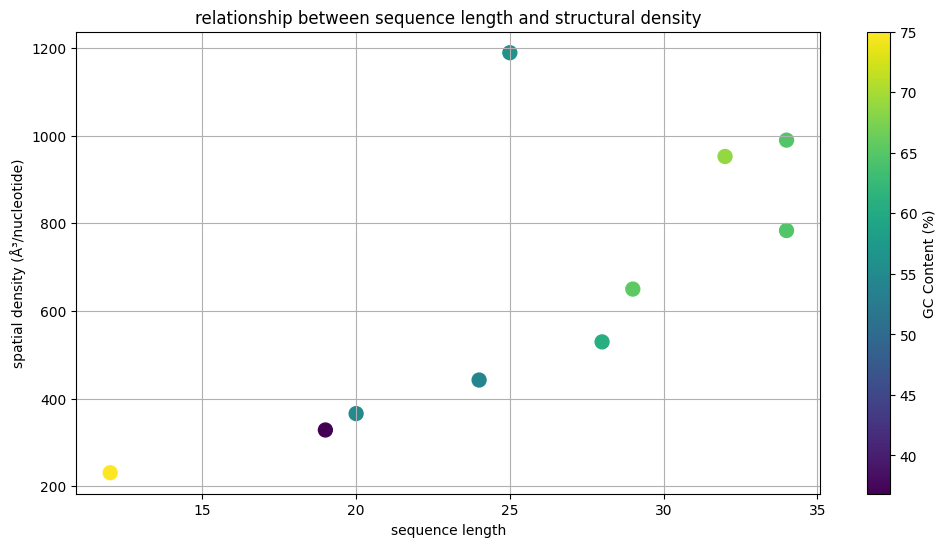

In [27]:
# analyze structural complexity
print("=== structural complexity analysis ===")

def analyze_complexity(sequence, coords):
    # calculate basic metrics
    gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
    
    # calculate spatial density (volume per nucleotide)
    x_range = coords['x_1'].max() - coords['x_1'].min()
    y_range = coords['y_1'].max() - coords['y_1'].min()
    z_range = coords['z_1'].max() - coords['z_1'].min()
    volume = x_range * y_range * z_range
    density = volume / len(sequence)
    
    return {
        'length': len(sequence),
        'gc_content': gc_content,
        'spatial_density': density
    }

# analyze first 10 structures
complexity_data = []
for _, row in train_sequences.head(10).iterrows():
    target_id = row['target_id']
    coords = train_labels[train_labels['ID'].str.startswith(target_id)]
    stats = analyze_complexity(row['sequence'], coords)
    complexity_data.append(stats)
    
# create scatter plot
plt.figure(figsize=(12, 6))
lengths = [d['length'] for d in complexity_data]
densities = [d['spatial_density'] for d in complexity_data]
gc_contents = [d['gc_content'] for d in complexity_data]

plt.scatter(lengths, densities, c=gc_contents, cmap='viridis', s=100)
plt.colorbar(label='GC Content (%)')
plt.xlabel('sequence length')
plt.ylabel('spatial density (Å³/nucleotide)')
plt.title('relationship between sequence length and structural density')
plt.grid(True)
plt.show()

### findings cont'd:

**sequence length vs spatial density relationship:**
  - there's a clear positive correlation between sequence length and spatial density  
  - as sequences get longer (15 to 35 nucleotides), they tend to occupy more space per nucleotide (200 to 1200 Å³/nucleotide)  
  - this suggests longer sequences adopt more expanded conformations rather than compact ones  

**GC content distribution (shown by color gradient):**
  - lower GC content (darker colors, around 40–45%) appears more frequently in shorter sequences  
  - higher GC content (lighter/greener colors, around 60–75%) is more common in longer sequences  
  - this suggests GC content might influence structural stability and complexity  

**clustering patterns:**
  - points seem to form clusters around certain length ranges:  
    - short sequences (15–20 nt) with low spatial density (200–400 Å³/nucleotide)  
    - medium sequences (20–25 nt) with moderate density (400–800 Å³/nucleotide)  
    - longer sequences (30–35 nt) with high density (800–1200 Å³/nucleotide)  


### updated dynamic points of interest:

- examine 50 structures instead of just 10  
- add new metrics like radius of gyration and aspect ratio  
- look at GC runs (consecutive G-C nucleotides)  
- provide statistical correlations between all metrics  
- generate four different visualizations to better understand the relationships  
- include summary statistics for all features  


=== Extended Structural Complexity Analysis ===


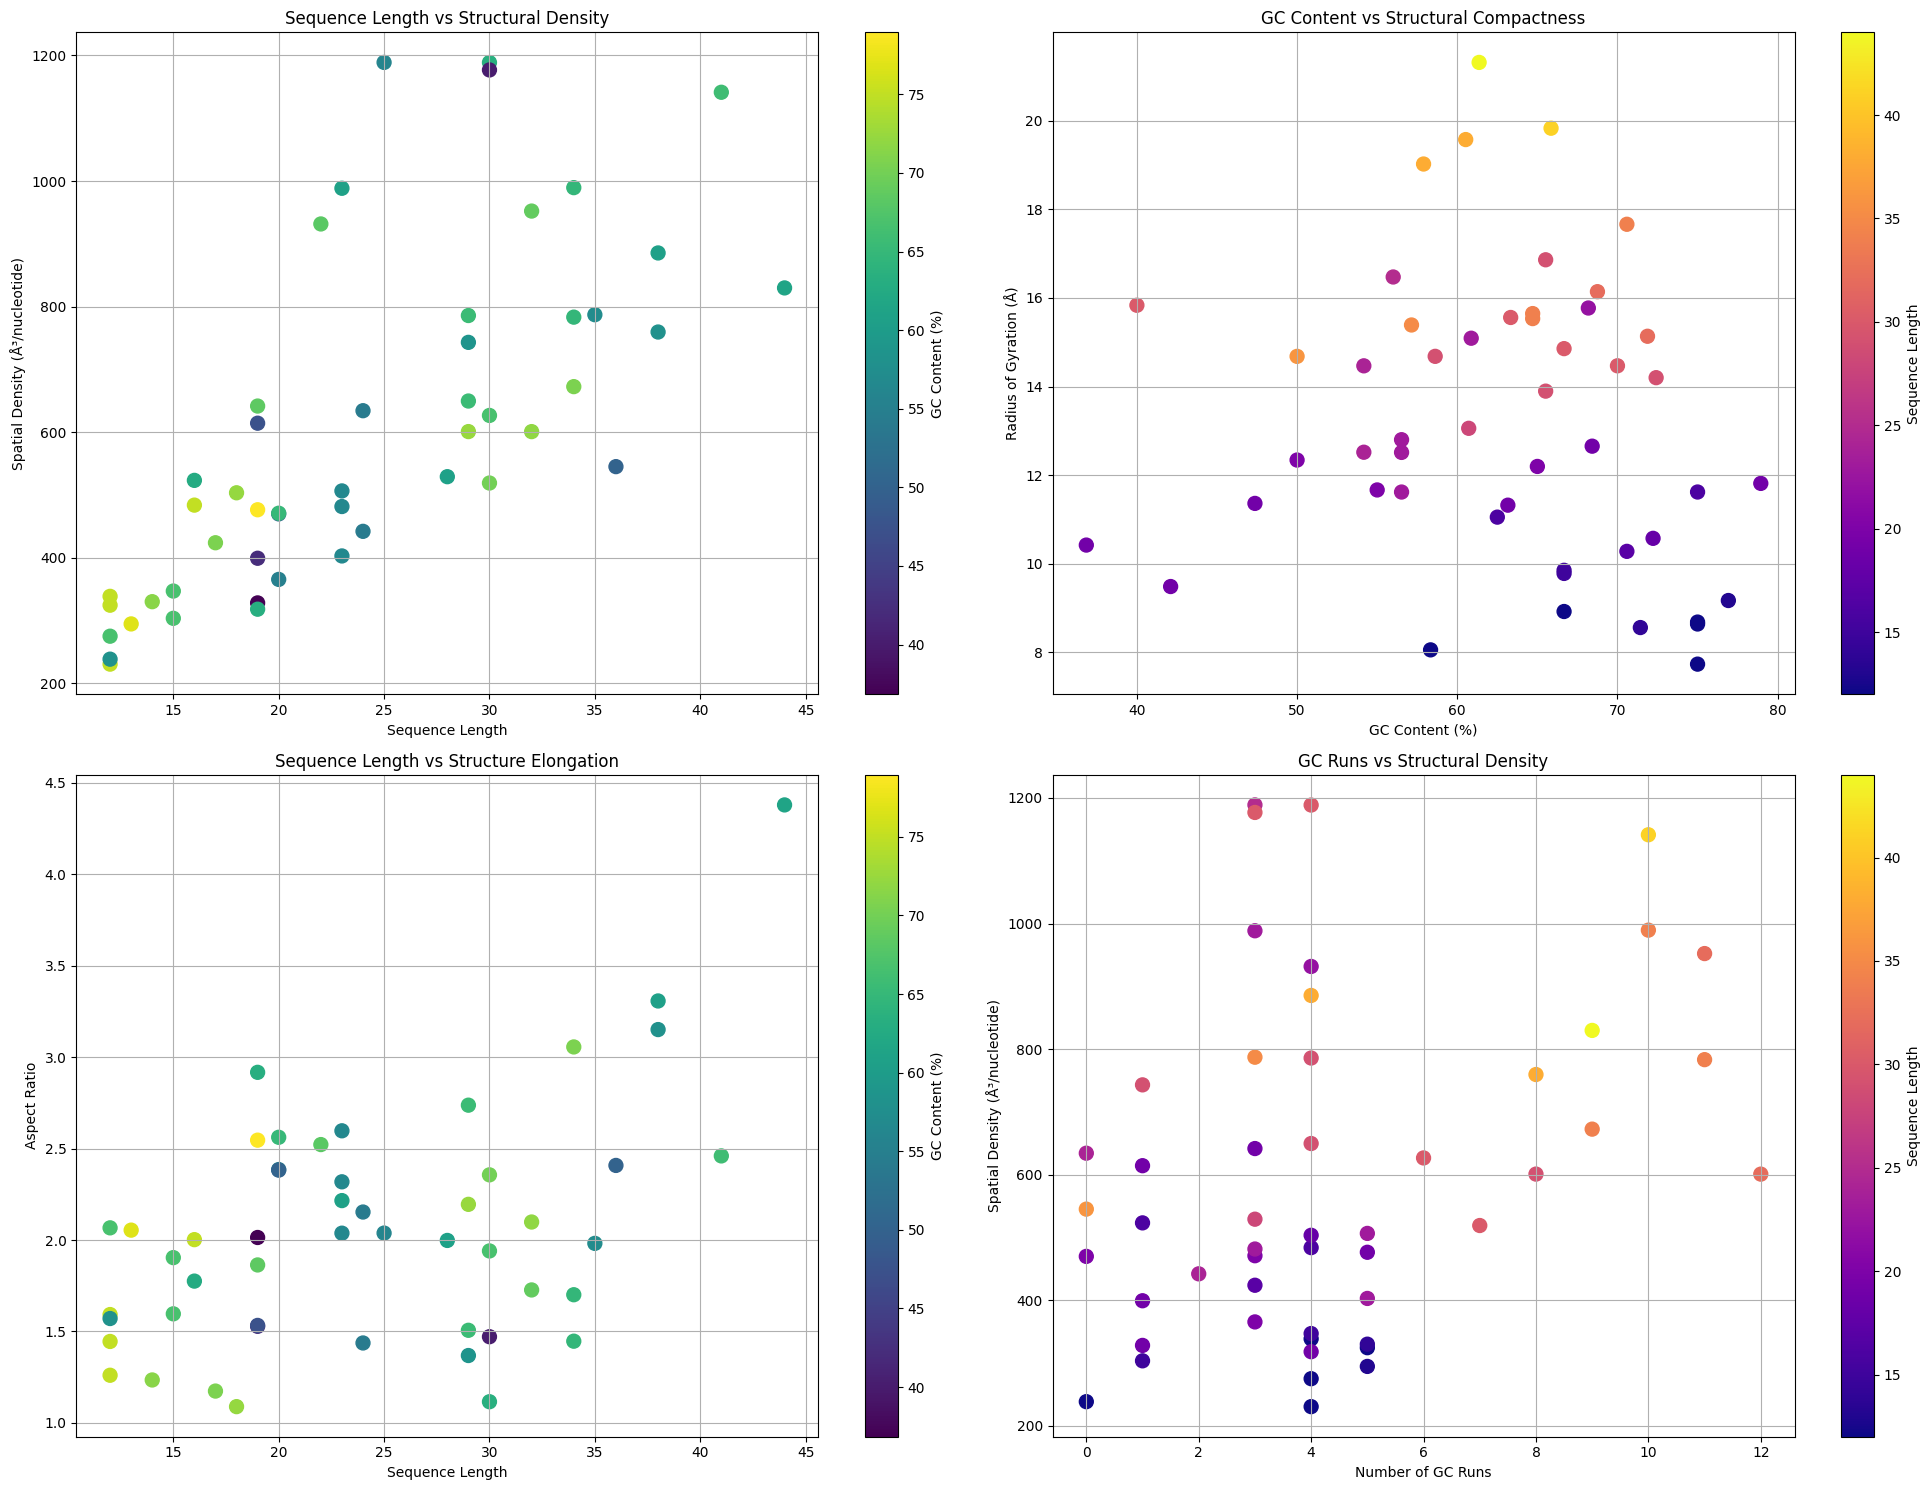


=== Statistical Correlations ===

Pearson Correlation Matrix:
Length vs GC Content: -0.189
Length vs Spatial Density: 0.709
Length vs Radius of Gyration: 0.932
Length vs GC Runs: 0.517
Length vs Aspect Ratio: 0.478
GC Content vs Spatial Density: -0.162
GC Content vs Radius of Gyration: -0.133
GC Content vs GC Runs: 0.472
GC Content vs Aspect Ratio: -0.047
Spatial Density vs Radius of Gyration: 0.812
Spatial Density vs GC Runs: 0.336
Spatial Density vs Aspect Ratio: 0.130
Radius of Gyration vs GC Runs: 0.478
Radius of Gyration vs Aspect Ratio: 0.582
GC Runs vs Aspect Ratio: 0.242

=== Summary Statistics ===

Length:
Mean: 24.14
Std: 8.43
Min: 12.00
Max: 44.00

GC Content:
Mean: 62.76
Std: 9.41
Min: 36.84
Max: 78.95

Spatial Density:
Mean: 600.98
Std: 262.42
Min: 230.74
Max: 1188.93

Radius of Gyration:
Mean: 13.22
Std: 3.25
Min: 7.74
Max: 21.31

GC Runs:
Mean: 4.34
Std: 3.04
Min: 0.00
Max: 12.00

Aspect Ratio:
Mean: 2.04
Std: 0.63
Min: 1.09
Max: 4.38


In [29]:
print("=== Extended Structural Complexity Analysis ===")

def analyze_complexity_extended(sequence, coords):
    # Basic metrics
    gc_content = (sequence.count('G') + sequence.count('C')) / len(sequence) * 100
    
    # Spatial metrics
    x_range = coords['x_1'].max() - coords['x_1'].min()
    y_range = coords['y_1'].max() - coords['y_1'].min()
    z_range = coords['z_1'].max() - coords['z_1'].min()
    volume = x_range * y_range * z_range
    density = volume / len(sequence)
    
    # Calculate radius of gyration (measure of compactness)
    x_center = coords['x_1'].mean()
    y_center = coords['y_1'].mean()
    z_center = coords['z_1'].mean()
    
    radius_of_gyration = np.sqrt(np.mean((coords['x_1'] - x_center)**2 + 
                           (coords['y_1'] - y_center)**2 + 
                           (coords['z_1'] - z_center)**2))
    
    # Local structure metrics
    local_gc_runs = len([i for i in range(len(sequence)-2) 
                        if all(n in 'GC' for n in sequence[i:i+3])])
    
    return {
        'length': len(sequence),
        'gc_content': gc_content,
        'spatial_density': density,
        'radius_of_gyration': radius_of_gyration,
        'gc_runs': local_gc_runs,
        'aspect_ratio': max(x_range, y_range, z_range) / min(x_range, y_range, z_range)
    }

# Analyze first 50 structures
complexity_data = []
for _, row in train_sequences.head(50).iterrows():
    target_id = row['target_id']
    coords = train_labels[train_labels['ID'].str.startswith(target_id)]
    stats = analyze_complexity_extended(row['sequence'], coords)
    complexity_data.append(stats)

# Create multiple visualizations
plt.figure(figsize=(20, 15))

# 1. Length vs Density with GC content (as before but with more points)
plt.subplot(2, 2, 1)
lengths = [d['length'] for d in complexity_data]
densities = [d['spatial_density'] for d in complexity_data]
gc_contents = [d['gc_content'] for d in complexity_data]

plt.scatter(lengths, densities, c=gc_contents, cmap='viridis', s=100)
plt.colorbar(label='GC Content (%)')
plt.xlabel('Sequence Length')
plt.ylabel('Spatial Density (Å³/nucleotide)')
plt.title('Sequence Length vs Structural Density')
plt.grid(True)

# 2. GC Content vs Radius of Gyration
plt.subplot(2, 2, 2)
gc_contents = [d['gc_content'] for d in complexity_data]
r_gyrations = [d['radius_of_gyration'] for d in complexity_data]
plt.scatter(gc_contents, r_gyrations, c=lengths, cmap='plasma', s=100)
plt.colorbar(label='Sequence Length')
plt.xlabel('GC Content (%)')
plt.ylabel('Radius of Gyration (Å)')
plt.title('GC Content vs Structural Compactness')
plt.grid(True)

# 3. Length vs Aspect Ratio
plt.subplot(2, 2, 3)
aspect_ratios = [d['aspect_ratio'] for d in complexity_data]
plt.scatter(lengths, aspect_ratios, c=gc_contents, cmap='viridis', s=100)
plt.colorbar(label='GC Content (%)')
plt.xlabel('Sequence Length')
plt.ylabel('Aspect Ratio')
plt.title('Sequence Length vs Structure Elongation')
plt.grid(True)

# 4. GC Runs vs Spatial Density
plt.subplot(2, 2, 4)
gc_runs = [d['gc_runs'] for d in complexity_data]
plt.scatter(gc_runs, densities, c=lengths, cmap='plasma', s=100)
plt.colorbar(label='Sequence Length')
plt.xlabel('Number of GC Runs')
plt.ylabel('Spatial Density (Å³/nucleotide)')
plt.title('GC Runs vs Structural Density')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print statistical correlations
print("\n=== Statistical Correlations ===")
data_array = np.array([(d['length'], d['gc_content'], d['spatial_density'], 
                       d['radius_of_gyration'], d['gc_runs'], d['aspect_ratio']) 
                      for d in complexity_data])

features = ['Length', 'GC Content', 'Spatial Density', 'Radius of Gyration', 
           'GC Runs', 'Aspect Ratio']
correlation_matrix = np.corrcoef(data_array.T)

print("\nPearson Correlation Matrix:")
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:
            corr = correlation_matrix[i,j]
            print(f"{feature1} vs {feature2}: {corr:.3f}")

# Print summary statistics
print("\n=== Summary Statistics ===")
for feature in features:
    feature_key = feature.lower().replace(' ', '_')
    values = [d[feature_key] for d in complexity_data]
    print(f"\n{feature}:")
    print(f"Mean: {np.mean(values):.2f}")
    print(f"Std: {np.std(values):.2f}")
    print(f"Min: {np.min(values):.2f}")
    print(f"Max: {np.max(values):.2f}")

### findings cont'd:

**length-related correlations:**
  - very strong correlation between length and radius of gyration (0.932)  
  - strong correlation between length and spatial density (0.709)  
  - moderate correlation with GC runs (0.517) and aspect ratio (0.478)  
  - this confirms longer sequences tend to form larger, more complex structures  

**GC content insights:**
  - mean GC content is 62.76% with relatively low variation (std: 9.41%)  
  - surprisingly weak correlation with spatial density (-0.162)  
  - moderate correlation with GC runs (0.472)  
  - the relationship between GC content and structural features is more nuanced than initially thought  

**structural compactness:**
  - strong correlation between spatial density and radius of gyration (0.812)  
  - aspect ratios are relatively consistent (mean: 2.04, std: 0.63)  
  - most structures maintain a moderate elongation rather than being highly compact or extremely elongated  

**key findings from plots:**

  - **sequence length vs structural density:**
    - clear positive trend but with increasing variance  
    - clusters forming around specific length ranges  
    - GC content (color) shows interesting patterns at different lengths  

  - **GC content vs structural compactness:**
    - radius of gyration increases with sequence length (color gradient)  
    - no strong linear relationship with GC content  
    - suggests other factors influence structural compactness  

  - **length vs structure elongation:**
    - most structures maintain aspect ratios between 1.5 and 3.0  
    - few outliers with high elongation (>4.0)  
    - no clear relationship between GC content and elongation  

  - **GC runs vs structural density:**
    - positive but scattered relationship  
    - length (color) shows clear stratification  
    - suggests GC runs contribute to, but don't determine, structural density  

**implications for prediction:**

  - **primary features:**
    - sequence length should be a key input feature (strong correlations)  
    - radius of gyration could be a good intermediate prediction target  
    - consider using aspect ratio as a constraint in predictions  

  - **secondary features:**
    - GC content might be more useful when combined with other features  
    - local GC runs could be valuable for predicting local structure  
    - consider using ratios or normalized versions of these metrics  
